In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install apyori

In [3]:
groceries_data = pd.read_csv('groceries.csv', header=None)

groceries_data.shape

(9836, 33)

In [4]:
groceries_data.head(8)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
1,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Any columns fully empty?
groceries_data.columns[groceries_data.isna().all()].tolist()

[]

## Params 
- Transactions: List of lists that contain the items in each transaction.

- min_support: Minimum support of relations; means that the relation should be present in at least 3 transactions out of total transactions.

- min_confidence: Minimum confidence of relations; means that the relation should be found true in at least 20% of the total transactions in which the antecedent is present.

- min_lift: Minimum lift of relations; means that the relation should be at least 3 times more than the confidence.

- min_length: Minimum number of items in the relation.

- max_length: Maximum number of items in the relation.

In [6]:
from apyori import apriori # importing apriori

transactions = []

for i in range(0, 9835):
    transactions.append([str(groceries_data.values[i,j]) for j in range(0, 32)])

# Training Apriori on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2, random_state = 42)

## Visualizing Results

In [7]:
rules = list(rules)

rules[:5]

[RelationRecord(items=frozenset({'10', 'domestic eggs'}), support=0.005083884087442806, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10'}), items_add=frozenset({'domestic eggs'}), confidence=0.2032520325203252, lift=3.2034995830727535)]),
 RelationRecord(items=frozenset({'11', 'domestic eggs'}), support=0.0037620742247076767, ordered_statistics=[OrderedStatistic(items_base=frozenset({'11'}), items_add=frozenset({'domestic eggs'}), confidence=0.20329670329670332, lift=3.2042036489151875)]),
 RelationRecord(items=frozenset({'frankfurter', '11'}), support=0.003965429588205389, ordered_statistics=[OrderedStatistic(items_base=frozenset({'11'}), items_add=frozenset({'frankfurter'}), confidence=0.21428571428571433, lift=3.633620689655173)]),
 RelationRecord(items=frozenset({'domestic eggs', '12'}), support=0.003253685815963396, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12'}), items_add=frozenset({'domestic eggs'}), confidence=0.2735042735042735, lift=4.3107604

In [8]:
results = []

for item in rules:
    """
    first index of the inner list contains base item and add item
    second index of the inner list contains base item
    third index of the list contains add item and so on..
    """
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    rows = (value0, value1, value2, value3, value4)
    results.append(rows)

labels = ['Title 1', 'Title 2', 'Support', 'Confidence', 'Lift']

groceries_suggestion = pd.DataFrame.from_records(results, columns = labels)

groceries_suggestion.sort_values('Lift', ascending = False, inplace = True)

groceries_suggestion.head(10)

,Title 1,Title 2,Support,Confidence,Lift
22,sugar,flour,0.00498,0.28654,8.46311
25,processed cheese,white bread,0.00416,0.25153,5.97544
19,bottled beer,liquor,0.00467,0.42201,5.24059
12,root vegetables,14,0.00376,0.48051,4.40849
3,domestic eggs,12,0.00325,0.27350,4.31076
24,root vegetables,herbs,0.00701,0.43124,3.95647
18,berries,whipped/sour cream,0.00904,0.27217,3.79688
26,root vegetables,rice,0.00315,0.41333,3.79210
8,whipped/sour cream,12,0.00315,0.26495,3.69624
21,margarine,flour,0.00376,0.21637,3.69451


### Removing records with numbers in Title 1 and Title 2 columns (i.e. no product names)

In [9]:
groceries_suggestion = groceries_suggestion[~groceries_suggestion['Title 1'].str.contains(r'\d')]
groceries_suggestion = groceries_suggestion[~groceries_suggestion['Title 2'].str.contains(r'\d')]

groceries_suggestion.head(10)

,Title 1,Title 2,Support,Confidence,Lift
22,sugar,flour,0.00498,0.28654,8.46311
25,processed cheese,white bread,0.00416,0.25153,5.97544
19,bottled beer,liquor,0.00467,0.42201,5.24059
24,root vegetables,herbs,0.00701,0.43124,3.95647
18,berries,whipped/sour cream,0.00904,0.27217,3.79688
26,root vegetables,rice,0.00315,0.41333,3.79210
21,margarine,flour,0.00376,0.21637,3.69451
16,whipped/sour cream,baking powder,0.00457,0.25862,3.60785
23,whipped/sour cream,flour,0.00406,0.23391,3.26324
20,bottled beer,red/blush wine,0.00488,0.25396,3.15375


* Confidence: Conditional probability of item B given A (i.e; number of times if 'x' is bought then 'y' is also bought together)

* Support: Probability of an item A being bought (i.e; number of times 'x' is bought divided by total number of transactions)

* Lift: Ratio of confidence to support (i.e; confidence/support). This is used to find the strength of the rule.

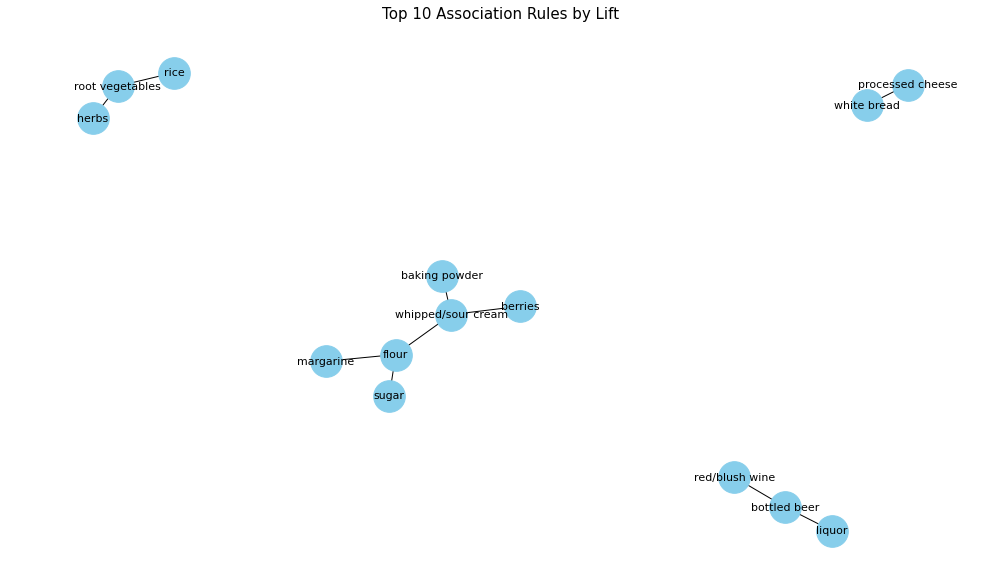

In [10]:
import networkx as nx

fig, ax=plt.subplots(figsize=(14,8))
GA=nx.from_pandas_edgelist(groceries_suggestion.head(10),source='Title 1',target='Title 2')
nx.draw(GA, with_labels=True, font_size=11, node_size=1000, node_color='skyblue', ax=ax, edge_color='black', linewidths=1)
plt.tight_layout()
plt.title('Top 10 Association Rules by Lift', fontsize=15)
plt.show()

### Conclusion:

* In apriori based analysis, The higher the lift value the higher the correlation between the items.

* Fine-tuned version of apriori algorithm is `ECLAT` (Equivalence Class Clustering and bottom-up Lattice Traversal) algorithm.

* ECLAT is `faster` than apriori algorithm. And can be used for `clustering`.